#### Performing EDA and finding out the under performing dealers.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
retail_df = pd.read_csv("retail_data.csv", encoding='latin-1')

In [3]:
retail_df.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


#### looking at size of data

In [4]:
retail_df.shape

(229, 40)

#### looking at statistical details of data

In [5]:
retail_df.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,229.000000,183.000000,48.000000,48.000000,0.0,229.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,601742.572052,1.842459,1.874375,10.229167,NaN,1045.323144,0.243243,0.648649,0.486486,0.081081,0.027027,0.162162
std,6573.378113,2.595590,2.313372,14.925688,NaN,220.032076,0.434959,0.483978,0.506712,0.276725,0.164399,0.373684
min,600001.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,600033.000000,0.550000,0.530000,2.000000,NaN,921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600059.000000,1.070000,1.150000,6.000000,NaN,1030.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,600099.000000,2.000000,1.622500,10.500000,NaN,1129.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,635810.000000,25.000000,10.950000,73.000000,NaN,3121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### looking at all the columns

In [6]:
retail_df.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

#### Checking the variable type

In [7]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 40 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

There are 28 categorical variables and 12 numerical variables.

#### Checking for null values

In [8]:
retail_df.isnull().apply(pd.value_counts)

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
False,229.0,229.0,229.0,229.0,229.0,229.0,229.0,229.0,229.0,229.0,...,NaN,171,229.0,53,37,37,37,37,37,37
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,229.0,58,NaN,176,192,192,192,192,192,192


In [62]:
retail_df.isnull().sum()

Month                                          0
Enquiry Date                                   0
Enquiry Id                                     0
Allocation Status                              0
Status                                         0
State                                          0
City                                           0
Pincode                                        0
Type of Project                                0
No of Windows                                  0
Source                                         0
Zone                                           0
Dealer Name                                    0
First Action-Call made                         0
Date DD/MM/YY                                  0
First Action-Call Status                       0
Date of Appointment (DD/MM/YY)                37
Second Action-Customer Meeting                37
Date DD/MM/YY.1                               37
Second Action-Call Status                     38
Third Action-Quote G

#### null values percentage in data

In [9]:
(retail_df.isnull().apply(pd.value_counts)/len(retail_df))*100

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
False,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,NaN,74.672489,100.0,23.144105,16.157205,16.157205,16.157205,16.157205,16.157205,16.157205
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,25.327511,NaN,76.855895,83.842795,83.842795,83.842795,83.842795,83.842795,83.842795


In [10]:
(retail_df.isnull().sum()/len(retail_df))*100

Month                                          0.000000
Enquiry Date                                   0.000000
Enquiry Id                                     0.000000
Allocation Status                              0.000000
Status                                         0.000000
State                                          0.000000
City                                           0.000000
Pincode                                        0.000000
Type of Project                                0.000000
No of Windows                                  0.000000
Source                                         0.000000
Zone                                           0.000000
Dealer Name                                    0.000000
First Action-Call made                         0.000000
Date DD/MM/YY                                  0.000000
First Action-Call Status                       0.000000
Date of Appointment (DD/MM/YY)                16.157205
Second Action-Customer Meeting                16

 Here we don't need to treat null values because we are not building a model.

In [11]:
retail_df["Allocation Status"].value_counts()

Dealer    165
Direct     64
Name: Allocation Status, dtype: int64

In [12]:
# We need only Dealer Data
dealer = retail_df[retail_df["Allocation Status"]=="Dealer"]

In [13]:
dealer["Dealer Name"].value_counts()

Windoors      45
Sunbird       33
Winfratech    20
OXXO          20
Rajtechnis    15
ITP           13
Pearlson       8
pearlson       7
Direct         4
Name: Dealer Name, dtype: int64

Here again after segregating the dealer and direct data separately we see that there are still some orders which are falling under dealer bucket this mightbe typo error.

In [14]:
dealer_data = dealer[dealer["Dealer Name"]!="Direct"]

dealer_data.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking at number of dealers

In [15]:
dealer_data["Dealer Name"].value_counts() #we see a mistake in pearlson dealer name

Windoors      45
Sunbird       33
Winfratech    20
OXXO          20
Rajtechnis    15
ITP           13
Pearlson       8
pearlson       7
Name: Dealer Name, dtype: int64

In [16]:
dealer_data["Dealer Name"].replace(to_replace='pearlson',value="Pearlson",inplace=True)

In [17]:
dealer_data["Dealer Name"].value_counts()

Windoors      45
Sunbird       33
Winfratech    20
OXXO          20
Pearlson      15
Rajtechnis    15
ITP           13
Name: Dealer Name, dtype: int64

In [18]:
# There are 7 Dealers in total

In [19]:
# Looking at Dealers Order Status

In [20]:
pd.crosstab(dealer_data["Dealer Name"],dealer_data["Status"])

Status,Lost,Won
Dealer Name,,
ITP,13,0
OXXO,16,4
Pearlson,11,4
Rajtechnis,14,1
Sunbird,24,9
Windoors,39,6
Winfratech,18,2


#### conversion rate of dealers

In [21]:
CONVERSION_RATE = pd.crosstab(dealer_data["Dealer Name"],dealer_data["Status"]).apply(lambda r:r/r .sum(),axis=1)
CONVERSION_RATE

Status,Lost,Won
Dealer Name,,
ITP,1.000000,0.000000
OXXO,0.800000,0.200000
Pearlson,0.733333,0.266667
Rajtechnis,0.933333,0.066667
Sunbird,0.727273,0.272727
Windoors,0.866667,0.133333
Winfratech,0.900000,0.100000


From the above analysis we can say that sunbird has a good conversion rate of all the dealers.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

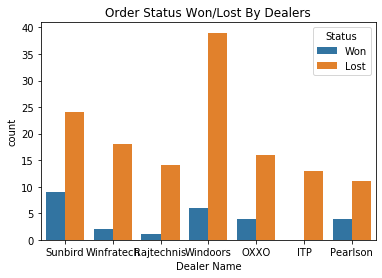

In [27]:
sns.countplot(x="Dealer Name",hue="Status",data=dealer_data).set_title("Order Status Won/Lost By Dealers")
plt.show()

In [28]:
# checkign area wise orders count

In [29]:
dealer_data["City"].value_counts()

CHENNAI           111
THIRUVALLUR        20
KANCHIPURAM        18
VELLORE             6
VILLUPURAM          2
KRISHNAGIRI         2
CUDDALORE           1
TIRUVANNAMALAI      1
Name: City, dtype: int64

In [30]:
pd.crosstab(dealer_data["Dealer Name"],dealer_data["City"])

City,CHENNAI,CUDDALORE,KANCHIPURAM,KRISHNAGIRI,THIRUVALLUR,TIRUVANNAMALAI,VELLORE,VILLUPURAM
Dealer Name,,,,,,,,
ITP,7,0,1,0,4,0,0,1
OXXO,11,0,3,0,6,0,0,0
Pearlson,15,0,0,0,0,0,0,0
Rajtechnis,14,0,0,0,1,0,0,0
Sunbird,25,0,6,0,1,1,0,0
Windoors,24,1,3,2,8,0,6,1
Winfratech,15,0,5,0,0,0,0,0


we can see almost most of the orders are coming from Chennai City followed by Kanchipuram so better tofocus more on chennai region for improvement in sales.

As Chennai is a metro city location might be playing a huge role in the market.

In [31]:
# checking for project type in orders

In [32]:
dealer_data["Type of Project"].value_counts()

Renovation          105
New Construction     56
Name: Type of Project, dtype: int64

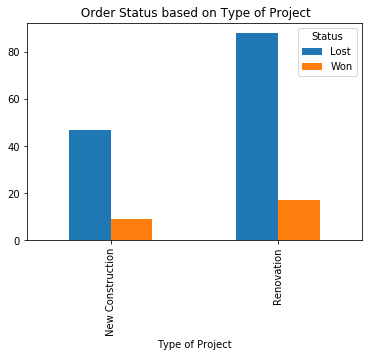

In [34]:
pd.crosstab(dealer_data['Type of Project'],dealer_data["Status"]).plot(kind="bar")
plt.title(" Order Status based on Type of Project")
plt.show()

In [35]:
pd.crosstab(dealer_data['Type of Project'],dealer_data["Status"])

Status,Lost,Won
Type of Project,,
New Construction,47,9
Renovation,88,17


In [36]:
pd.crosstab(dealer_data['Type of Project'],dealer_data["Status"]).apply(lambda r:r/r .sum(),axis=1)

Status,Lost,Won
Type of Project,,
New Construction,0.839286,0.160714
Renovation,0.838095,0.161905


Almost both the type of project has same conversion rate not much difference

#### Reasons Why Order is lost for dealers

In [37]:
dealer_data["Remarks"].value_counts()

Price Issue                      79
Budget Constraint                20
Design Infeasibility             20
Price issue                       3
Delivery Issue                    2
No Requirment                     1
Design Infeasibe My               1
No Requirement-Awareness Call     1
Others                            1
Design Not Feasible               1
Delivery Issve                    1
Name: Remarks, dtype: int64

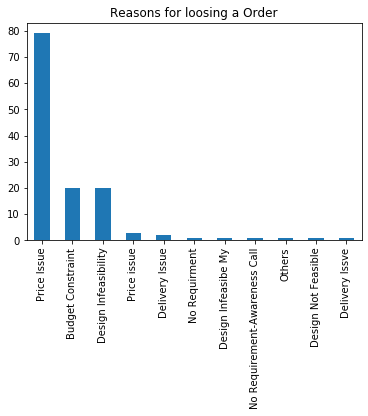

In [42]:
dealer_data["Remarks"].value_counts().plot(kind= "bar").set_title("Reasons for loosing a Order")
plt.show()

In [39]:
dealer_data[" Order Recd\\Lost "].value_counts()

Lost to UPVC (Provide details)    63
Order Received                    26
Lost to Wooden                    25
Product Issue-Design/Type         23
Lost to Aluminum                  21
Delivery Time Not Possible         3
Name:  Order Recd\Lost , dtype: int64

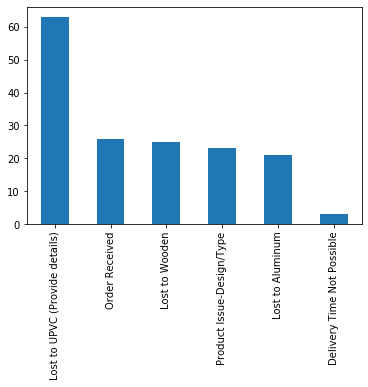

In [41]:
dealer_data[" Order Recd\Lost "].value_counts().plot(kind="bar")
plt.show()

we can clearly say that almost 70% of the reason for loosing a order is PRICE ISSUE so need to keep in my mind that there might be competitors in the market who are offering for less price comparatively also need to look in design feasibility options provided for customers.

One more major reason is Lost to UPVC, by studying a bit about the domain i came to an understanding that UPVC are a type of windows which are not available with the dealers this might be the case that they are unable to convert the orders.

In [43]:
dealer_data["Benefits"].value_counts()

Reduce Street Noise                      6
Nil                                      5
Reduce AC Energy Cost & Street Noise     4
Aesthetics & Low Maintenance             3
Low Maintenance                          2
Reduce Street Noise & Low Maintenance    1
Low Maintenance & Aesthetics             1
Reduce Street noise                      1
nil                                      1
Noise Proof & Better Lighting            1
Aesthetics & Street Noise                1
Name: Benefits, dtype: int64

When the order is succesfull most times Reduce Street Noise Benefit is given but the difference from the other benfits when the order is successful is not that high.

In [44]:
dealer_data["First Action-Call Status"].value_counts()

Appointment Fixed                132
Budget Constraint                 19
Design not Feasible                6
No Requirement-Awareness Call      3
Time Frame Not Possible            1
Name: First Action-Call Status, dtype: int64

In [45]:
dealer_data["First Action-Call Status"].count()

161

In [46]:
dealer_data["Second Action-Call Status"].value_counts()

Quote to Be Submitted       129
Design not Feasible           1
Further Meeting Required      1
Name: Second Action-Call Status, dtype: int64

In [47]:
dealer_data["Second Action-Call Status"].count()

131

Here when the first call was made, out of 161 customers 132 customers have fixed an appointment and 19 customers dropped due to budget constraint not a big number to worry as of now and in second call status out of 132 customers who are scheduled for meeting 129 customers asked for the Price Quotation.

In [48]:
dealer_data["Q Val. (Rs. Lac)"].count()

124


But finally only 124 customers have taken Price Quotation

A Simple Loop For Finding the Dealer wise Price Quotations Total

In [49]:
Price_Quotation_Dealer_wise = pd.Series()
for i in dealer_data['Dealer Name'].unique():
    Price_Quotation_Dealer_wise[i] = dealer_data[dealer_data['Dealer Name']==i]["Q Val. (Rs. Lac)"].sum() 
Price_Quotation_Dealer_wise

Sunbird       46.41
Winfratech    16.62
Rajtechnis    14.81
Windoors      69.82
OXXO          26.49
ITP           17.45
Pearlson      15.89
dtype: float64

#### Total Number Of Orders Each Dealer Got

In [50]:
Orders_each_dealer_got = pd.Series()

for i in dealer_data["Dealer Name"].unique():
    Orders_each_dealer_got[i] = dealer_data[dealer_data['Dealer Name']==i]['Status'].count()
Orders_each_dealer_got

Sunbird       33
Winfratech    20
Rajtechnis    15
Windoors      45
OXXO          20
ITP           13
Pearlson      15
dtype: int64

Here Windoors has got highest number of orders 45 and it have quotation price of worth 69 lakhs and it is followed by Winfratech,Rajtechnis,Windoors,OXXO,ITP,Pearlson but what is the final Conversion rate And which dealer has highest Order Price

In [51]:
dealer_data["Order Val. (Rs. Lac)"].count()

24

In [52]:
dealer_data[dealer_data["Status"]=="Won"]["Status"].count()    

26

Here we have mismatch between total orders which got won status and Order Value. There are 2 missing values in Order Value

In [53]:
dealer_data["Order Val. (Rs. Lac)"].describe()

count    24.000000
mean      1.901667
std       2.559672
min       0.070000
25%       0.537500
50%       1.080000
75%       1.507500
max      10.950000
Name: Order Val. (Rs. Lac), dtype: float64

In [54]:
Order_value_Dealer_wise = pd.Series()
for i in dealer_data['Dealer Name'].unique():
    Order_value_Dealer_wise[i] = dealer_data[dealer_data['Dealer Name']==i]["Order Val. (Rs. Lac)"].sum() 
Order_value_Dealer_wise

Sunbird       10.30
Winfratech     2.11
Rajtechnis     0.53
Windoors      11.54
OXXO           7.39
ITP            0.00
Pearlson      13.77
dtype: float64

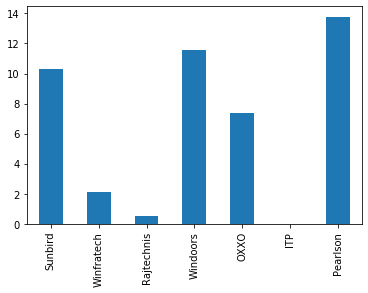

In [60]:
Order_value_Dealer_wise.plot(kind="bar")
plt.show()

In [56]:
Order_value_Dealer_wise.describe()

count     7.000000
mean      6.520000
std       5.636884
min       0.000000
25%       1.320000
50%       7.390000
75%      10.920000
max      13.770000
dtype: float64

In [57]:
CONVERSION_RATE['Won'].describe()

count    7.000000
mean     0.148485
std      0.102777
min      0.000000
25%      0.083333
50%      0.133333
75%      0.233333
max      0.272727
Name: Won, dtype: float64


Now we can find the under performers by 2 ways by looking at their CONVERSION RATE of orders and by Average ORDER VALUE the avg order value is 6.52 lakhs but again avg order value depends on the ORDER QUANTITY so we need to take both average CONVERSION RATE and Average ORDER VALUE to evaluate the Performers

The Average Conversion Rate and Average Order Quantity are 14.8% and 6.52 lakhs respectively

Now Under Performing Dealers Are :

In [58]:
Order_value_Dealer_wise

Sunbird       10.30
Winfratech     2.11
Rajtechnis     0.53
Windoors      11.54
OXXO           7.39
ITP            0.00
Pearlson      13.77
dtype: float64

In [59]:
CONVERSION_RATE

Status,Lost,Won
Dealer Name,,
ITP,1.000000,0.000000
OXXO,0.800000,0.200000
Pearlson,0.733333,0.266667
Rajtechnis,0.933333,0.066667
Sunbird,0.727273,0.272727
Windoors,0.866667,0.133333
Winfratech,0.900000,0.100000


Here Sunbird, OXXO, Pearlson Clearly comes under Top Performer

Windoors have good Order value and conversion rate is 1% below the average so we can consider it as a good performer

Winfratech,Rajtechnis,ITP these DEALERS are the UNDER PERFORMERS